In [1]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import os
import numpy as np

In [2]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [3]:
imagepath = r"E:\Kuliah\Bangkit\Capstone\Dataset\LabelledWith LP\Cirebon\1.E 3977 QM-09-19.jpeg"

In [4]:
image = cv2.imread(imagepath)
image2 = image_resize(image,width=100)

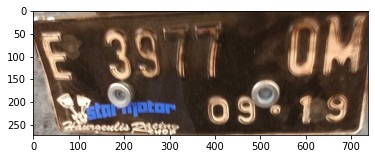

In [5]:
plt.imshow(image)

In [ ]:
gray = cv2.imread(imagepath, 0)
gray = cv2.resize( gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(gray, (5,5), 0)
gray = cv2.medianBlur(gray, 3)
# perform otsu thresh (using binary inverse since opencv contours work better with white text)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
cv2.imshow("Otsu", thresh)
cv2.waitKey(0)
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))